In [1]:
import anndata
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import numpy as np

from matplotlib import patches
import seaborn as sns

/data/home/lukatang/anaconda3/envs/monae/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
dataset = "pbmc"

sc.set_figure_params(dpi=80)

combined = anndata.read_h5ad(f"/aaa/gelseywang/buddy1/lukatang/PairedIntegration/Modal_next_repo_v1/dataset_repo/unpaired/{dataset}/combined.h5ad")

In [3]:
combined.obsm['X_umap_ori'] = combined.obsm['X_umap']
del combined.obsm['X_umap']
sc.external.pp.bbknn(combined, batch_key='batch')
sc.tl.umap(combined)

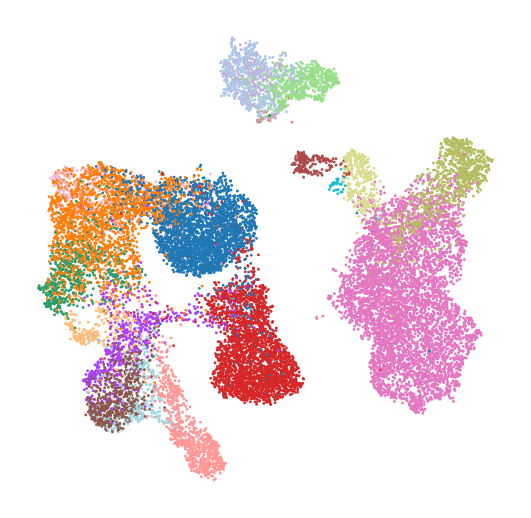

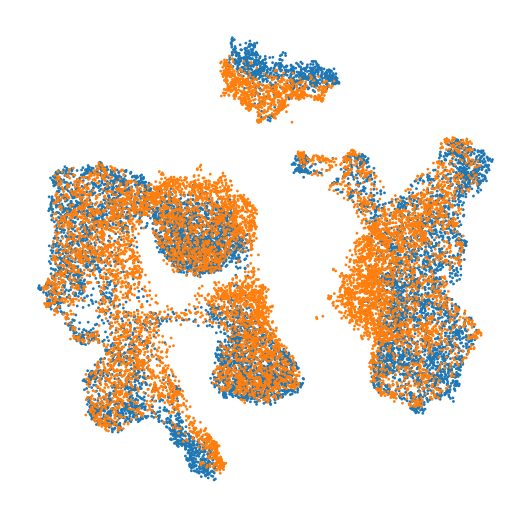

In [4]:
sc.set_figure_params(dpi=80)

modal_names = ['RNA', 'ATAC']
combined.uns["batch_colors"] = list(sns.color_palette(n_colors=len(modal_names)).as_hex())

fig = sc.pl.umap(combined, color=['cell_type'], title='', frameon = False, return_fig=True)
ct_handles, ct_labels = fig.axes[0].get_legend_handles_labels()
fig.axes[0].get_legend().remove()

fig = sc.pl.umap(combined, color=['batch'], title='', frameon = False, return_fig=True)
domain_handles, domain_labels = fig.axes[0].get_legend_handles_labels()
fig.axes[0].get_legend().remove()